# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel('housing.xlsx')
#variable and this is a function for uploading the dataset

In [34]:
dataset.head(5)
# ocean proximity value: (1) - near ocean, (2) - near bay, (3) - <1h ocean, (4) - island for ocean_proximity

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,2,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,2,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,2,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,2,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,2,342200


### Getting the inputs and output

In [35]:
# [rows,columns]
X = dataset.iloc[:,:-1].values
print(X)

[[-122.23     37.88     41.     ...  126.        8.3252    2.    ]
 [-122.22     37.86     21.     ... 1138.        8.3014    2.    ]
 [-122.24     37.85     52.     ...  177.        7.2574    2.    ]
 ...
 [-121.22     39.43     17.     ...  433.        1.7       0.    ]
 [-121.32     39.43     18.     ...  349.        1.8672    0.    ]
 [-121.24     39.37     16.     ...  530.        2.3886    0.    ]]


In [36]:
y = dataset.iloc[:,-1].values
print(y)

[452600 358500 352100 ...  92300  84700  89400]


### Creating the Training Set and the Test Set

In [37]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a functionq
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [38]:
print(X_train)

[[-117.55     33.83      6.     ...   65.        4.2386    0.    ]
 [-122.44     37.73     52.     ...  447.        4.3898    2.    ]
 [-118.       33.83     26.     ...  368.        3.9333    3.    ]
 ...
 [-121.9      36.58     31.     ...  393.        3.1977    1.    ]
 [-117.93     33.62     34.     ...  468.        5.6315    3.    ]
 [-115.56     32.8      15.     ...  298.        1.3882    0.    ]]


In [39]:
print(X_test)

[[-117.05     32.58     22.     ...  371.        4.1518    1.    ]
 [-117.97     33.92     32.     ...  429.        5.7796    3.    ]
 [-121.84     38.65     29.     ...  534.        4.3487    0.    ]
 ...
 [-120.92     38.86     11.     ...  326.        3.2027    0.    ]
 [-121.95     37.96     18.     ...  374.        6.1436    0.    ]
 [-118.2      34.12     52.     ...  406.        3.3326    3.    ]]


In [40]:
print(y_train)

[500001 270000 196100 ... 289300 484600  69400]


In [41]:
print(y_test)

[136900 241300 200700 ... 128600 259500 167600]


## Part 2 - Building and training the model

### Building the model

In [42]:
# linear_model is the module
# LinearRegression is a class, it contains a pre-coded blueprint on how to build a linear regression model
# Class is a pre-coded blueprint of something we want to build from which objects are created.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the Model

In [43]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(random_state = 0)
model.fit(X_train, y_train)
#Histogram-Based Gradient Boosting (HistGradientBoosting) is a type of gradient boosting algorithm 
#that is optimized for large datasets and handles missing values more effectively than traditional gradient 
#boosting. In scikit-learn, it’s available through HistGradientBoostingClassifier and HistGradientBoostingRegressor.

HistGradientBoostingRegressor(random_state=0)

### Inference

In [44]:
y_pred = model.predict(X_test)
print(y_pred)

[148511.48603221 275969.09907557 155380.36815235 ... 138977.22027099
 242892.35459711 193021.15334347]


#### Making the prediction of a median house price based on the variables Lo:-122.23 La= 37.88 HM= 41 TR= 880 TB= 129 Po= 322 HH= 126 MI= 8.3252 OP= 2

In [45]:
print(model.predict([[-122.23,37.88,41,880,129.0,322,126,8.3252,2]]))

[438679.82833789]


## Part 3: Evaluating the Model

Axes(0.125,0.11;0.775x0.77)


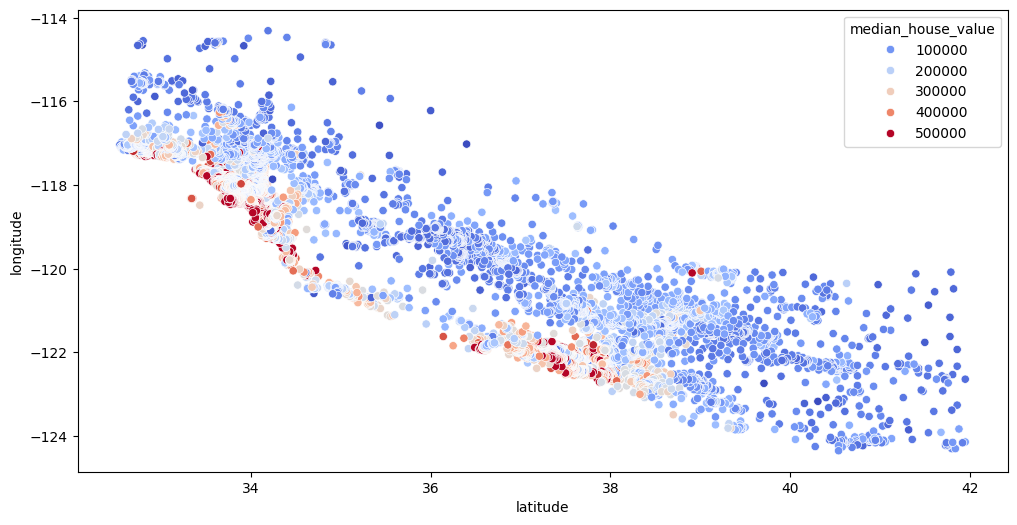

In [46]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(x="latitude",y="longitude",data=dataset,hue="median_house_value",palette="coolwarm"))

### R-Squared

In [47]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.8308688954656841


### Adjusted R-Squared

In [48]:
k = X_test.shape[1]
k

9

In [49]:
n = X_test.shape[0]
n

4128

In [50]:
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.8304992548778238